In [1]:
from qiskit import QuantumRegister, QuantumCircuit, assemble, ClassicalRegister
from qiskit import Aer
from qiskit.visualization import plot_histogram, plot_bloch_multivector, array_to_latex
from qiskit.extensions import Initialize
from qiskit.quantum_info import random_statevector
from qiskit_textbook.tools import vector2latex

In [2]:
# This function generates a random quantum state for a single qubit and creates an # initialization gate that can be used to prepare that state in a quantum circuit.
def superposition_gate():
    # Create random 1-qubit state
    psi = random_statevector(2)
    # Create a gate that will assign random amplitudes
    init_gate = Initialize(psi)
    init_gate.label = "init"
    # Display the vector
    display(array_to_latex(psi, prefix="|\\psi\\rangle ="))
    return init_gate

In [3]:
def plot_bloch_sphere(qc):
    # Get the backend for the quantum simulator
    simulator = Aer.get_backend('qasm_simulator')
    # Save the current statevector of the quantum circuit
    qc.save_statevector()
    # Assemble the quantum circuit into a quantum object (qobj) for execution
    qobj = assemble(qc)
    # Run the quantum circuit on the simulator and obtain the results
    res = simulator.run(qobj).result()
    # Extract the statevector from the results of the simulation	
    statevec = res.get_statevector()    
    # Display the vector
    vector2latex(statevec, pretext="|\\psi\\rangle =")
    # Display it horizontally
    display(array_to_latex(statevec, prefix="|\\psi\\rangle ="))    
    return statevec

In [4]:
# Function to introduce Bbit-flip error
def bit_error(qc):
    # Apply the Pauli X gate (bit-flip) to the first qubit
    qc.x(0)
    return qc

In [5]:
# This function implements error correction for bit-flip error in a quantum 
# circuit. It utilizes CNOT gates to add redundancy to the qubit q[0] that is
# being transmitted. If the 'error' flag is set to True, it introduces a simulated 
# bit-flip error to test the correction process. The final portion of 
# the function containing CNOT and Toffoli gates after the error block is 
# the error correction circuit.

def bit_error_correction(qc, error):
    # Apply a CNOT gate from qubit 0 to qubit 1
    qc.cx(0,1)
    # Apply a CNOT gate from qubit 0 to qubit 2
    qc.cx(0,2)    
    # Introduce error if the 'error' flag is set to True
    if error:
        qc.barrier() # Add a barrier for clarity in visualization
        # Call the bit_error function to introduce a bit-flip error
        qc = bit_error(qc)
        qc.barrier()  # Add another barrier after introducing the error  
    # Apply CNOT gate from qubit 0 to qubit 1    
    qc.cx(0,1)
    # Apply CNOT gate from qubit 0 to qubit 2
    qc.cx(0,2)
    # Apply a Toffoli gate (CCX) with qubits 1 & 2 as control and 0 as target
    qc.ccx(2,1,0)    
    return qc

In [6]:
qreg = QuantumRegister(3, 'q')
creg = ClassicalRegister(3, 'c')

In [7]:
# Create a quantum circuit for the main operation
qc = QuantumCircuit(qreg, creg)
# Create a separate quantum circuit to model the error
qc_error = QuantumCircuit(qreg, creg)
# Create a quantum circuit dedicated to the error correction process
qc_correction = QuantumCircuit(qreg, creg)

In [8]:
# initialize psi
init_gate = superposition_gate()

C:\Users\sudee\AppData\Local\Temp\ipykernel_25396\3165964421.py:4: DeprecationWarning: `product` is deprecated as of NumPy 1.25.0, and will be removed in NumPy 2.0. Please use `prod` instead.
  psi = random_statevector(2)


<IPython.core.display.Latex object>

In [9]:
# Append the initialization gate to qubit 0 in the main circuit
qc.append(init_gate, [0])
# Append the same initialization gate to the error circuit
qc_error.append(init_gate, [0])
# Append the same initialization gate to the error correction circuit
qc_correction.append(init_gate, [0])

# Plot Bloch sphere for original circuit

<IPython.core.display.Math object>

<IPython.core.display.Latex object>

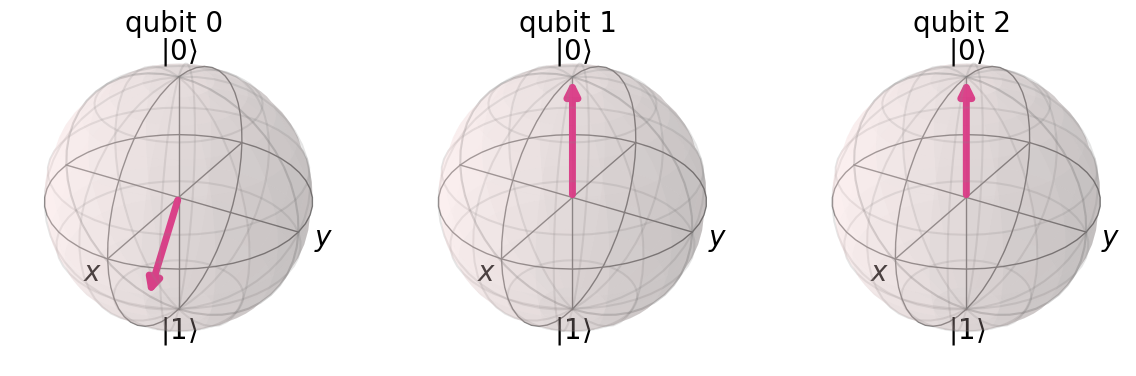

In [10]:
st1 = plot_bloch_sphere(qc)
plot_bloch_multivector(st1)

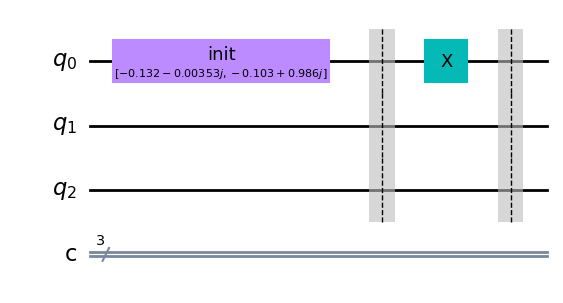

In [11]:
# Apply bit-flip error to qc_error circuit
qc_error.barrier()   # Apply a barrier for clarity in visualization 
# Introduce a bit-flip error to the qc_error circuit by calling the function
qc_error = bit_error(qc_error)
qc_error.barrier() # Add another barrier to separate operations
# Draw and display the qc_error circuit
qc_error.draw(output='mpl')

# Plot Bloch sphere after introducing error

<IPython.core.display.Math object>

<IPython.core.display.Latex object>

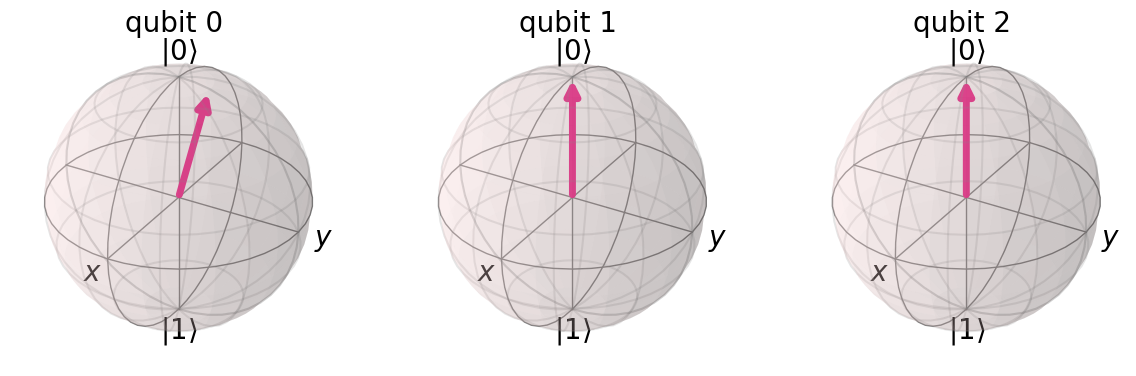

In [12]:
st2 = plot_bloch_sphere(qc_error)
plot_bloch_multivector(st2)

In [13]:
# Apply error correction
error = True
qc_correction = bit_error_correction(qc_correction, error)

# Plot Bloch sphere after error correction

<IPython.core.display.Math object>

<IPython.core.display.Latex object>

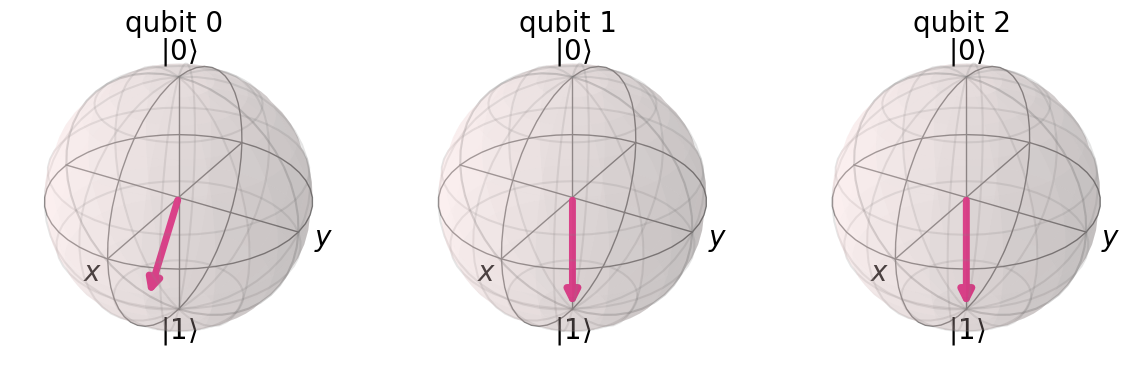

In [14]:
st3 = plot_bloch_sphere(qc_correction)
plot_bloch_multivector(st3)

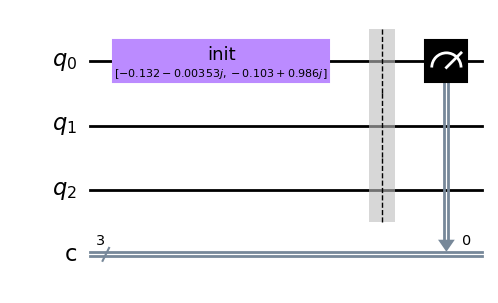

In [15]:
qc.measure([0],[0])
qc.draw(output='mpl')

In [16]:
# Get the backend for the quantum simulator
# Define the simulator
simulator = Aer.get_backend('qasm_simulator')
# Assemble the circuit
qobj = assemble(qc)
# Run the quantum circuit on the simulator Execute over 1000 iterations
results = simulator.run(qobj, shots=1000).result()
# Get count of occurrences of |0⟩ and |1⟩ over 1000 iterations.
answer = results.get_counts()

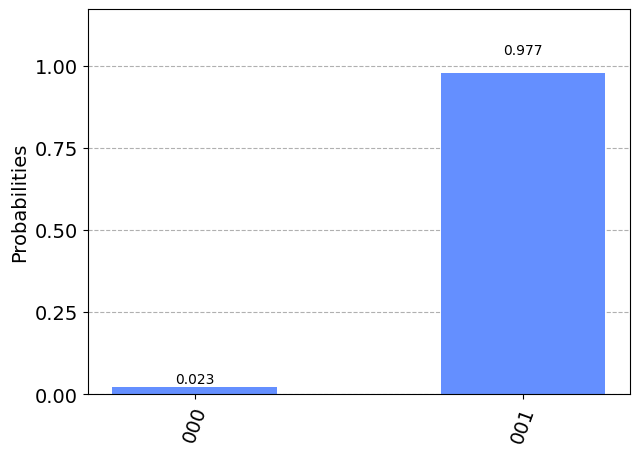

In [17]:
plot_histogram(answer)

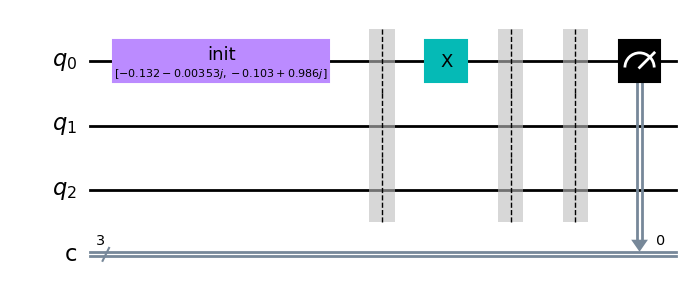

In [18]:
qc_error.measure([0],[0])
qc_error.draw(output='mpl')

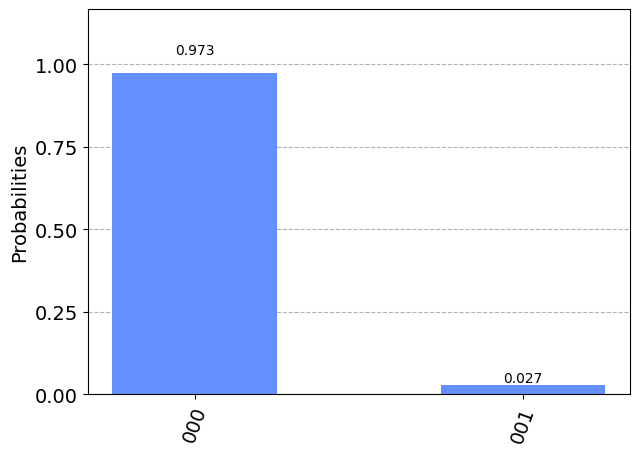

In [19]:
# Get the backend for the quantum simulator
simulator = Aer.get_backend('qasm_simulator')
# Assemble the circuit
qobj = assemble(qc_error)
# Run the quantum circuit on the simulator over 1000 iterations
results = simulator.run(qobj, shots=1000).result()
# Get count of occurrences of |0⟩ and |1⟩ over 1000 iterations.
answer = results.get_counts()
plot_histogram(answer)

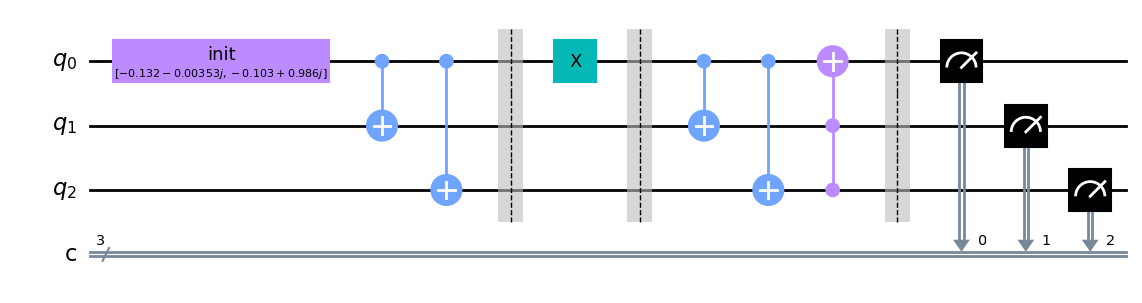

In [20]:
qc_correction.measure([0,1,2], [0,1,2])
qc_correction.draw(output='mpl')

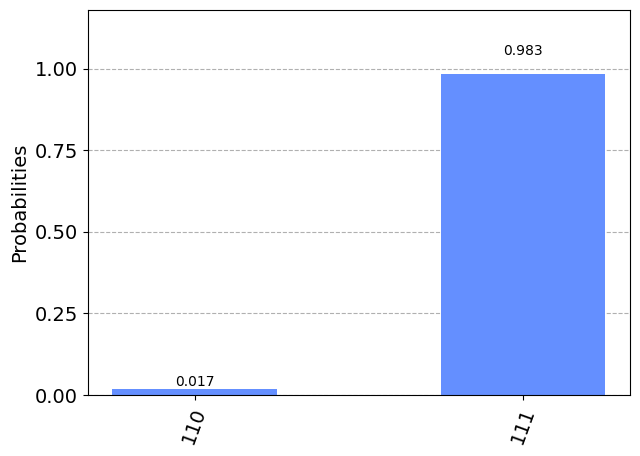

In [21]:
# Get the backend for the quantum simulator
simulator = Aer.get_backend('qasm_simulator')
# Assemble the circuit
qobj = assemble(qc_correction)
# Run the quantum circuit on the simulator over 1000 iterations
results = simulator.run(qobj, shots=1000).result()
# Get count of occurrences of |0⟩ and |1⟩ over 1000 iterations.
answer = results.get_counts()
plot_histogram(answer)